## Iterative Policy Evaluation

#### From previous code
* state space, action space, transition probability, various policy

In [4]:
# set state
import numpy as np
nCols = 3
nRows = 4
nWalls = 1
states = []
for i in range(nCols*nRows-nWalls):
    states.append(i)
N_STATES = len(states)
print(N_STATES)
print(states)

11
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [5]:
# set map
map = -np.ones((nCols+2,nRows+2))
for i in range(nCols):
    for j in range(nRows):
        map[i+1,j+1] = 0
map[2,2] = -1 # add wall
print(map)

[[-1. -1. -1. -1. -1. -1.]
 [-1.  0.  0.  0.  0. -1.]
 [-1.  0. -1.  0.  0. -1.]
 [-1.  0.  0.  0.  0. -1.]
 [-1. -1. -1. -1. -1. -1.]]


In [6]:
# set action
actions = [0, 1, 2, 3]
N_ACTIONS = len(actions)

In [7]:
# states -> location
locations = []
index = 0
for i in range(nCols):
    for j in range(nRows):
        if map[i+1,j+1]==0:
            locations.append((i+1,j+1))
            index = index + 1
print(locations) # match index with states
# action -> move
move = [(0,-1),(-1,0),(0,1),(1,0)] # match index with actions
print(move)

[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4)]
[(0, -1), (-1, 0), (0, 1), (1, 0)]


In [8]:
# set transition probability
P = np.zeros((N_STATES,N_ACTIONS,N_STATES)) # P[S,A,S']
for s in range(N_STATES):
    for a in range(N_ACTIONS):
        current_location = locations[s]
        # heading collectly  ####################################################################################
        next_location = (current_location[0] + move[a][0],current_location[1] + move[a][1])
        
        if map[next_location[0],next_location[1]] == -1: # there is barrier or wall
            next_location = current_location
            next_s = states[locations.index(next_location)]
        else:
            next_s = states[locations.index(next_location)]
        P[s,a,next_s] = P[s,a,next_s] + 0.8
        # left error ############################################################################################
        next_location = (current_location[0] + move[a-1][0],current_location[1] + move[a-1][1])
        if map[next_location[0],next_location[1]] == -1: # there is barrier or wall
            next_location = current_location
            next_s = states[locations.index(next_location)]
        else:
            next_s = states[locations.index(next_location)]
        P[s,a,next_s] = P[s,a,next_s] + 0.1
        # right error ############################################################################################
        next_location = (current_location[0] + move[(a+1)%4][0],current_location[1] + move[(a+1)%4][1])
        
        if map[next_location[0],next_location[1]] == -1: # there is barrier or wall
            next_location = current_location
            next_s = states[locations.index(next_location)]
        else:
            next_s = states[locations.index(next_location)]
        P[s,a,next_s] = P[s,a,next_s] + 0.1

In [9]:
# rewards s,a ---  R(s,a)  ---> s'
if True:
    R = -0.02*np.ones((N_STATES,N_ACTIONS))
else:
    R = -0.5*np.ones((N_STATES,N_ACTIONS))
R[3,:] = 1
R[6,:] = -1
print(R)
# discount factor
gamma = 0.99

[[-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [ 1.    1.    1.    1.  ]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-1.   -1.   -1.   -1.  ]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]]


In [10]:
# policy : given state which action would u choose
# assume that we know the policy
bad_policy = np.zeros((N_STATES,N_ACTIONS))
bad_policy[0,2] = 1
bad_policy[1,2] = 1
bad_policy[2,2] = 1
bad_policy[3,2] = 1
bad_policy[4,3] = 1
bad_policy[5,2] = 1
bad_policy[6,2] = 1
bad_policy[7,2] = 1
bad_policy[8,2] = 1
bad_policy[9,2] = 1
bad_policy[10,1] = 1

In [11]:
random_policy = 0.25*np.ones((N_STATES,N_ACTIONS))

In [12]:
optimal_policy = np.zeros((N_STATES,N_ACTIONS))
optimal_policy[0,2] = 1
optimal_policy[1,2] = 1
optimal_policy[2,2] = 1
optimal_policy[3,2] = 1
optimal_policy[4,1] = 1
optimal_policy[5,1] = 1
optimal_policy[6,1] = 1
optimal_policy[7,1] = 1
optimal_policy[8,0] = 1
optimal_policy[9,0] = 1
optimal_policy[10,0] = 1

In [13]:
optimalWithNoise_policy = np.zeros((N_STATES,N_ACTIONS))
ep = 0.1
optimalWithNoise_policy[0,2] = 1
optimalWithNoise_policy[1,2] = 1
optimalWithNoise_policy[2,2] = 1
optimalWithNoise_policy[3,2] = 1
optimalWithNoise_policy[4,1] = 1
optimalWithNoise_policy[5,1] = 1
optimalWithNoise_policy[6,1] = 1
optimalWithNoise_policy[7,1] = 1
optimalWithNoise_policy[8,0] = 1
optimalWithNoise_policy[9,0] = 1
optimalWithNoise_policy[10,0] = 1
optimalWithNoise_policy = optimalWithNoise_policy + (ep/4)*np.ones((N_STATES,N_ACTIONS))
optimalWithNoise_policy = optimalWithNoise_policy / np.sum(optimalWithNoise_policy,axis = 1).reshape((N_STATES,1))

## Iterative Evaluation for v_pi

* Initialize vpi(s)=0 for all s
* do for every s
    - vpi(s) = sumfor(a)( policy(a|s) (reward(a,s) + gamma sumfor(s)(P(s'|s,a)v(s') )))

In [53]:
# value function
# boundary condition
V = np.zeros((N_STATES))
V[3:] = 1 # goal state
V[6:] = -1 # fail state

# iterative policy evaluation
num_iteration = 300
V_history = np.zeros((num_iteration,N_STATES))
for iter in range(num_iteration):
    for s in range(N_STATES):
        for a in range(N_ACTIONS):
            # you can choose policy in here optimal_policy, bad_policy, random_policy optimalWithNoise_policy
            V[s] = sum([optimalWithNoise_policy[s,a]*gamma*sum([P[s,a,s1]*V[s1] for s1 in range(N_STATES)]) for a in range(N_ACTIONS)])
    V_history[iter,:] = V

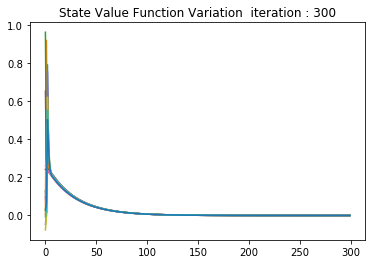

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
#print(V_history)
#print(V)
plt.title("State Value Function Variation"+"  iteration : "+str(num_iteration))
plt.plot(V_history)
plt.show()

## Iterative Evaluation for q_pi

* Initialize qpi(s,a)=0 for all s and a
* do for every s and a
    - qpi(s,a) = reward(a,s) + gamma sumfor(s')(P(s'|s,a)(sumfor(a')(qpi(s',a') )))